# Sources:
- https://www.kaggle.com/code/hamzaobaid/ufo-sighting-data-analysis-and-visualization

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ufo-sightings/complete.csv
/kaggle/input/ufo-sightings/scrubbed.csv


# Install Libraries and Modules

# Import Libraries and Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

# Ignore useless warnings
import warnings
warnings.filterwarnings('ignore')

## Read and Load Data

In [3]:
ufo_data = pd.read_csv('/kaggle/input/ufo-sightings/scrubbed.csv')

In [4]:
ufo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [5]:
ufo_data.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [6]:
# Find the number of null values for each column
num_null = ufo_data.isnull().sum()

# Find the percentage of null values for each column
percent_null = round((ufo_data.isnull().sum() / len(ufo_data)) * 100, 2)

# Combine the results into a single DataFrame
null_values = pd.concat([num_null, percent_null], axis=1, keys=['Number of Null Values', 'Percentage of Null Values'])

# Print the results
print(null_values)

                      Number of Null Values  Percentage of Null Values
datetime                                  0                       0.00
city                                      0                       0.00
state                                  5797                       7.22
country                                9670                      12.04
shape                                  1932                       2.41
duration (seconds)                        0                       0.00
duration (hours/min)                      0                       0.00
comments                                 15                       0.02
date posted                               0                       0.00
latitude                                  0                       0.00
longitude                                 0                       0.00


# Data Preprocessing

In [7]:
ufo_data.rename(columns={'duration (seconds)': 'duration_seconds'}, inplace=True)
ufo_data.rename(columns={'duration (hours/min)': 'duration_hours_min'}, inplace=True)
ufo_data.rename(columns={'longitude ': 'longitude'}, inplace=True)
ufo_data.head()

,datetime,city,state,country,shape,duration_seconds,duration_hours_min,comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [8]:
ufo_data['datetime'] = ufo_data['datetime'].str.replace('24:00', '00:00')

ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], format='%m/%d/%Y %H:%M')
ufo_data['duration_seconds'] = pd.to_numeric(ufo_data['duration_seconds'], errors='coerce')
ufo_data['date posted'] = pd.to_datetime(ufo_data['date posted'])
ufo_data['latitude'] = pd.to_numeric(ufo_data['latitude'], errors='coerce')
ufo_data['longitude'] = pd.to_numeric(ufo_data['longitude'], errors='coerce')
ufo_data.head()

,datetime,city,state,country,shape,duration_seconds,duration_hours_min,comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611


In [9]:
# Handling missing values for each column
ufo_data['state'].fillna('Unknown', inplace=True)  # Filling missing state values with 'Unknown'

ufo_data['country'].fillna('Unknown', inplace=True)  # Filling missing country values with 'Unknown'

ufo_data['shape'].fillna('Unknown', inplace=True)  # Filling missing shape values with 'Unknown'

ufo_data['duration_seconds'].fillna(0, inplace=True)  # Filling missing duration (seconds) values with 0


ufo_data['comments'].fillna('', inplace=True)  # Filling missing comments values with an empty string

# For missing latitude values, you can either drop the rows or fill them with an appropriate value depending on your use case.
# If you decide to fill missing latitude values, you can use a suitable method like mean, median, or forward-fill (ffill).
ufo_data['latitude'].fillna(method='ffill', inplace=True)  # Using forward-fill to fill missing latitude values

In [10]:
ufo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            80332 non-null  datetime64[ns]
 1   city                80332 non-null  object        
 2   state               80332 non-null  object        
 3   country             80332 non-null  object        
 4   shape               80332 non-null  object        
 5   duration_seconds    80332 non-null  float64       
 6   duration_hours_min  80332 non-null  object        
 7   comments            80332 non-null  object        
 8   date posted         80332 non-null  datetime64[ns]
 9   latitude            80332 non-null  float64       
 10  longitude           80332 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(6)
memory usage: 6.7+ MB


In [11]:
ufo_data.describe()

,datetime,duration_seconds,date posted,latitude,longitude
count,80332,8.033200e+04,80332,80332.000000,80332.000000
mean,2004-05-17 03:55:08.838818816,9.016889e+03,2007-07-28 02:15:17.074142464,38.124518,-86.772885
min,1906-11-11 00:00:00,0.000000e+00,1998-03-07 00:00:00,-82.862752,-176.658056
25%,2001-08-02 21:45:00,3.000000e+01,2003-11-26 00:00:00,34.134722,-112.073333
50%,2006-11-22 04:05:00,1.800000e+02,2007-11-28 00:00:00,39.411806,-87.903611
75%,2011-06-21 00:30:00,6.000000e+02,2011-10-10 00:00:00,42.788333,-78.755000
max,2014-05-08 18:45:00,9.783600e+07,2014-05-08 00:00:00,72.700000,178.441900
std,NaN,6.202168e+05,NaN,10.469577,39.697205


In [17]:
ufo_data.to_csv("ufo_data_scrubbed_preprocessed.csv")

# Data Visualization

In [13]:
# Shape distribution
shape_counts = ufo_data['shape'].value_counts().reset_index()
shape_counts.columns = ['Shape', 'Count']

fig = px.bar(shape_counts, x='Shape', y='Count', color='Shape',
             title='Distribution of UFO Shapes',
             labels={'Shape': 'Shape', 'Count': 'Count'},
             template='plotly_white')

fig.show()

In [14]:
# Extract year from the 'datetime' column
ufo_data['year'] = ufo_data['datetime'].dt.year

# Count sightings by year
year_counts = ufo_data['year'].value_counts().sort_index()


# Assuming you have a DataFrame called 'df' with the necessary data
fig = px.line(x=year_counts.index, y=year_counts.values)

# Update the figure layout to make it interactive
fig.update_layout(
    title='Number of UFO Sightings by Year',
    xaxis_title='Year',
    yaxis_title='Y-axis'
)

# Display the interactive plot
fig.show()

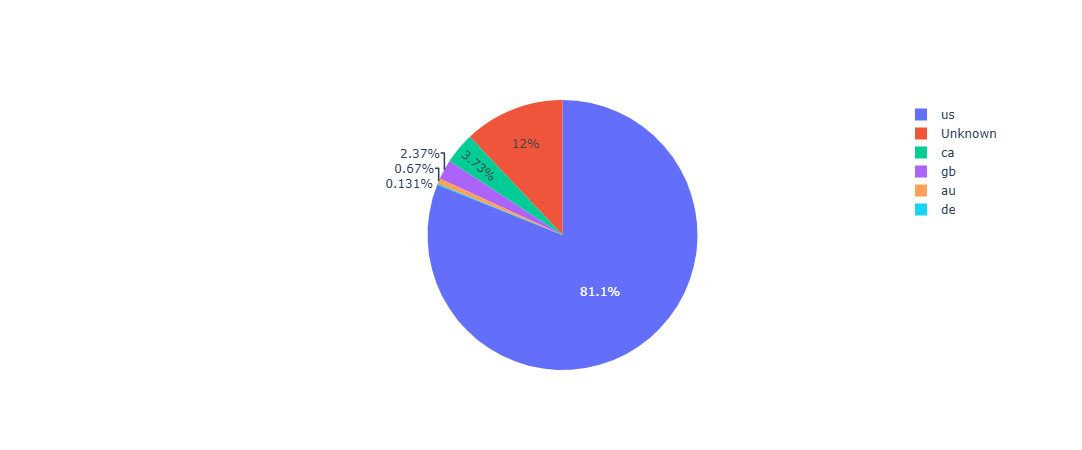

In [15]:
country_sightings = ufo_data.country.value_counts()  
country_fig = go.Figure(data=[go.Pie(labels=country_sightings.index, values=country_sightings.values)])

py.init_notebook_mode(connected=True)
py.iplot(country_fig)

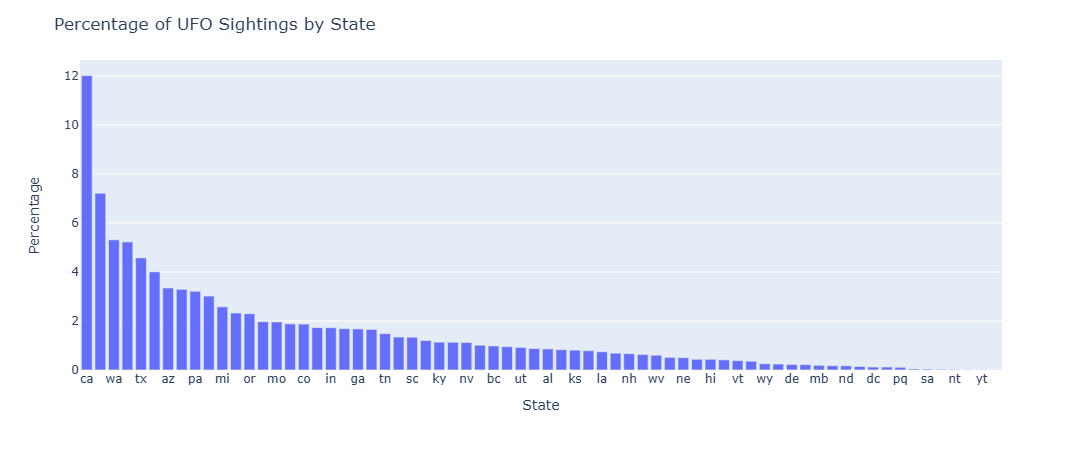

In [16]:
# Calculate the percentage of UFO sightings for each state
state_counts = ufo_data['state'].value_counts()
state_percentages = state_counts / state_counts.sum() * 100

# Create a new DataFrame with state and percentage columns
state_data = pd.DataFrame({'State': state_percentages.index, 'Percentage': state_percentages.values})

# Sort the DataFrame by percentage in descending order
state_data = state_data.sort_values('Percentage', ascending=False)

# Create an interactive bar plot using Plotly
fig = px.bar(state_data, x='State', y='Percentage', labels={'Percentage': 'Percentage (%)'})

# Customize the figure layout
fig.update_layout(
    title='Percentage of UFO Sightings by State',
    xaxis_title='State',
    yaxis_title='Percentage',
    hovermode='closest'
)

# Display the interactive plot
fig.show()

# Text Analysis

Text preprocessing steps will be applied in the second notebook.

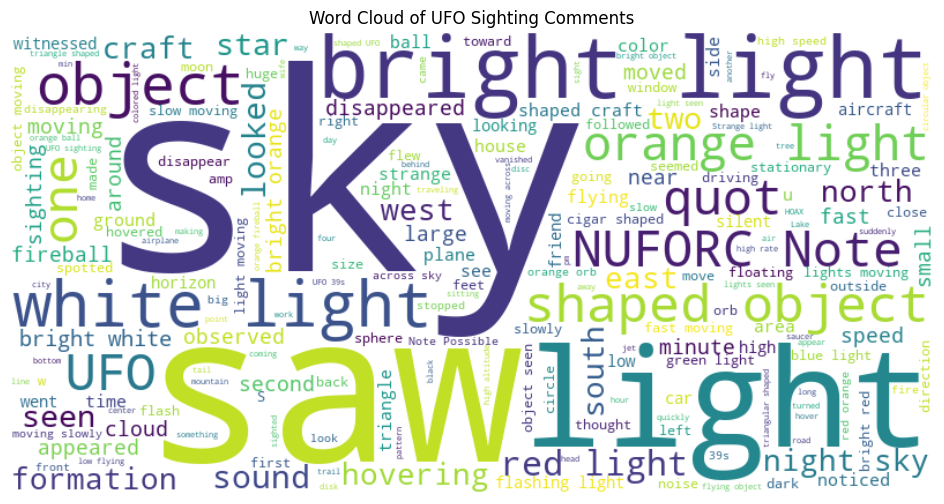

In [18]:
from wordcloud import WordCloud

# Concatenate all comments into a single string
comments_text = ' '.join(ufo_data['comments'].dropna().tolist())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comments_text)

# Display the interactive word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of UFO Sighting Comments')
plt.show()

# Anomaly Detection with Z-score

In [19]:
# Calculate z-score for the 'duration (seconds)' column
ufo_data['duration_zscore'] = (ufo_data['duration_seconds'] - ufo_data['duration_seconds'].mean()) / ufo_data['duration_seconds'].std()

# Filter out sightings with z-score above a threshold (e.g., 3)
anomalies = ufo_data[ufo_data['duration_zscore'] > 3]

# Display the anomalies
anomalies.sample(5)

,datetime,city,state,country,shape,duration_seconds,duration_hours_min,comments,date posted,latitude,longitude,year,duration_zscore
23721,1965-12-09 00:00:00,newtown square,pa,us,fireball,6120000.0,1700hrs,DEC 1965 NEWTOWN SQUARE PENN FLAMING BURNIN...,2006-07-16,39.986667,-75.401389,1965,9.852979
30617,1998-03-01 20:00:00,cebu city (philippines),Unknown,Unknown,other,5263200.0,1 to 2 months,End of the Century UFO,2006-05-15,10.315699,123.885437,1998,8.471527
17388,2002-12-01 00:00:00,gordes-manisa (turkey),Unknown,Unknown,fireball,2631600.0,one month,We see the same objects even on claudy days. T...,2002-12-23,38.932515,28.290666,2002,4.228494
21742,2013-12-31 00:00:00,chesterfield,va,us,oval,2102400.0,>8 months,Collection of orbs&#44 rods and discs sighted ...,2014-01-16,37.376944,-77.506111,2013,3.375244
69215,2002-08-24 01:00:00,englewood,fl,us,light,52623200.0,2 months,bright stars&#44 moving erratically&#44 over t...,2002-08-28,26.961667,-82.352778,2002,84.831923


# Map Visualization

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Preprocess data
ufo_data_clean = ufo_data.copy()
ufo_data_clean['latitude'] = ufo_data_clean['latitude'].astype(str).str.replace('[^0-9.-]', '')
ufo_data_clean['latitude'] = ufo_data_clean['latitude'].astype(float)

# Create a map to visualize UFO sightings
map_ufo = folium.Map(location=[ufo_data_clean['latitude'].mean(), ufo_data_clean['longitude'].mean()], zoom_start=4)

# Add markers for each sighting
marker_cluster = MarkerCluster().add_to(map_ufo)
for index, row in ufo_data_clean.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']],
                  popup=row['city'],
                  icon=folium.Icon(icon='cloud')).add_to(marker_cluster)

# Display the map
map_ufo